In this notebook, I was compare the GMF covariance matrix estimated from 200 mocks of one $\theta_\mathrm{HOD}$ versus 20,000 mocks with multiple $\theta_\mathrm{HOD}$. The motivation behind this is to see if we can use all 20,000 mocks for estimating the ICA/PCA likelihood. Preliminary results indicate that $200$ points may not be a sufficient sample of the PDF. 

In [1]:
import numpy as np

In [4]:
import env
import data as Dat
import nongauss as NG

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in all 20,000 mock catalogs

In [8]:
X = []
for irun in range(100):
    if irun == 0: X_i, Ns = NG.X_gmf('manodeep.run'+str(irun), n_arr=True)
    else: X_i = NG.X_gmf('manodeep.run'+str(irun))
    X.append(X_i)
X = np.concatenate(X) 

In [11]:
N_mid = 0.5 * (Ns[1:]+Ns[:-1])

Plot of all the GMFs. 

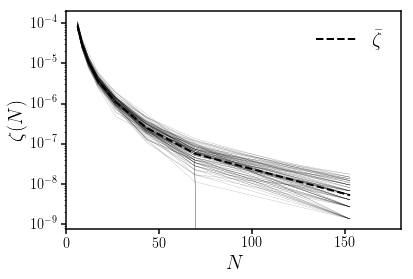

In [18]:
fig = plt.figure() 
sub = fig.add_subplot(111)
for i in np.random.choice(X.shape[0], 100, replace=False):
    sub.plot(N_mid, X[i,:], c='k', lw=0.1)
sub.plot(N_mid, np.average(X, axis=0), c='k', ls='--', lw=2, label=r'$\bar{\zeta}$')
sub.legend(loc='upper right', prop={'size': 20})
sub.set_xlim([0., 180.])
sub.set_xlabel('$N$', fontsize=20)
sub.set_yscale('log')
sub.set_ylabel(r'$\zeta(N)$', fontsize=20)

Now lets compare the covariance between one $\theta_\mathrm{HOD}$ and all $\theta_\mathrm{HOD}$ 

In [19]:
cov_one = np.cov(X[:200,:].T)
cov_all = np.cov(X.T)

In [27]:
print cov_all.max(), cov_all.min()

9.88506958348e-11 1.20398198063e-17


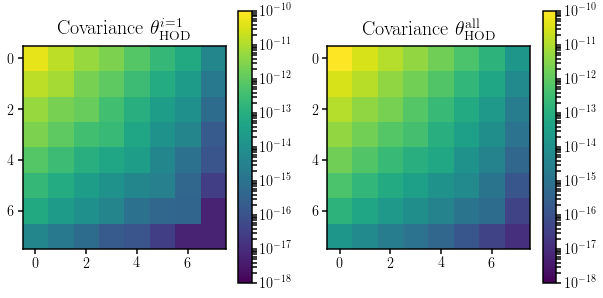

In [37]:
import matplotlib.colors as colors

fig = plt.figure(figsize=(10,5)) 
sub = fig.add_subplot(121)
subcov = sub.imshow(cov_one, norm=colors.LogNorm(1e-18, 1e-10))
fig.colorbar(subcov, ax=sub)
sub.set_title(r'Covariance $\theta^{i=1}_\mathrm{HOD}$', fontsize=20)
sub = fig.add_subplot(122)
subcov = sub.imshow(cov_all, norm=colors.LogNorm(1e-18, 1e-10))
sub.set_title(r'Covariance $\theta^\mathrm{all}_\mathrm{HOD}$', fontsize=20 )
fig.colorbar(subcov, ax=sub)

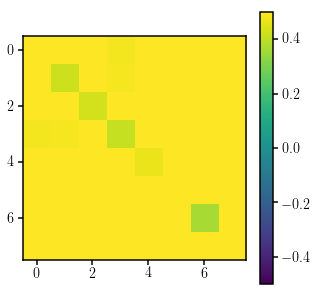

In [36]:
fig = plt.figure(figsize=(5,5)) 
sub = fig.add_subplot(111)
subcov = sub.imshow((cov_all-cov_one)/cov_all, vmin=-0.5, vmax=0.5)
fig.colorbar(subcov, ax=sub)# extend='max')
#sub.set_title(r'Covariance $\theta^{i=1}_\mathrm{HOD}$', fontsize=20)

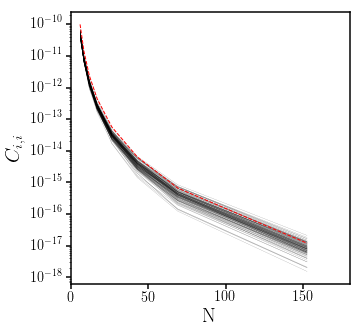

In [44]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
for i in range(100):
    cov_i = np.cov(X[200*i:200*(i+1),:].T)
    sub.plot(N_mid, np.diag(cov_i), c='k', lw=0.1)
sub.plot(N_mid, np.diag(cov_all), c='r', lw=1, ls='--', label='$\theta^{all}_\mathrm{HOD}$')
sub.set_xlim([0., 180.])
sub.set_xlabel('N', fontsize=20)
sub.set_yscale('log')
sub.set_ylabel('$C_{i,i}$', fontsize=20)